In [1]:
from mpl_toolkits.axes_grid1 import Grid
from os import listdir, path

In [2]:
dirs = [d for d in listdir('.') if d.startswith('visc_')]
dirs = sorted(dirs, key=lambda a: float(a.split('_')[-1]))
print(dirs)

['visc_hyper3_2e-14', 'visc_hyper3_6e-13', 'visc_nu_1e-5', 'visc_nu_5e-5', 'visc_nu_1e-4', 'visc_nu_2e-4']


In [11]:
pb_ges = []
tb_ges = []
dd_visc = {}
for dd in dirs:
    tb, powerb = pc.read_power('power_mag.dat', datadir=dd)
    nu_numeric = float(dd.split('_')[-1])
    #print(nu_numeric)
    dd_visc[dd] = nu_numeric
    pb_ges.append(powerb)
    tb_ges.append(tb)

In [4]:
dim = pc.read_dim(datadir=dirs[0])
krms = np.loadtxt(path.join(dirs[0],'power_krms.dat')).flatten()[:dim.nxgrid//2]

In [5]:
def to_times(s):
    s1, s2 = s.split('e')
    return r'{0}\times 10^{{{1}}}'.format(s1, s2)

In [6]:
for dd in dirs:
    print(to_times(dd.split('_')[-1]))

2\times 10^{-14}
6\times 10^{-13}
1\times 10^{-5}
5\times 10^{-5}
1\times 10^{-4}
2\times 10^{-4}


In [7]:
def plot_grid_spectra(ax, i):
    plottimes = []
    for t in [0,.1, .2, .5, 1,2,5,10, 20, 50, 100,200]:
        ti = search_indx(tb_ges[i], t, eps= 0.01)
        plottimes.append(ti)
    #print(plottimes)
    for p, pb in enumerate(pb_ges[i]):
        if p in plottimes:
            ax.loglog(krms, pb)
    ax.set_xlim(1,dim.nxgrid//2)
    ax.set_ylim(pb_ges[i][0,1], 1.5*pb_ges[i][0,:].max())

In [25]:
%matplotlib nbagg

<IPython.core.display.Javascript object>


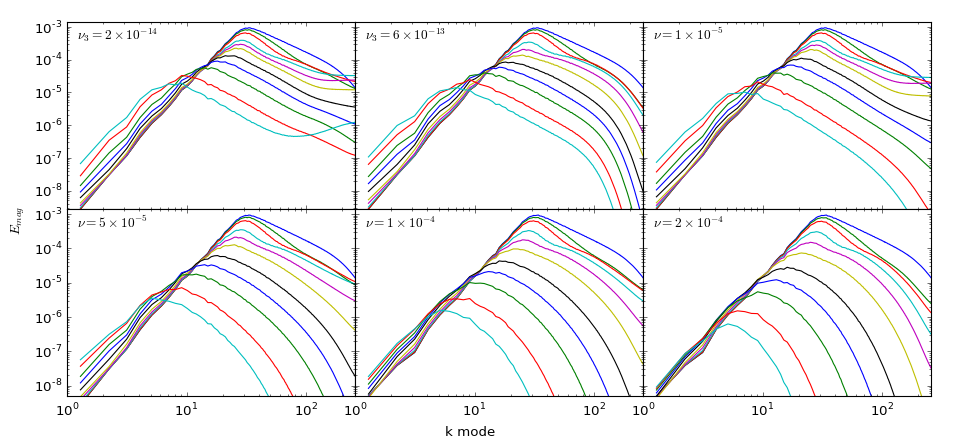

In [27]:
fig = plt.figure(figsize=(12,5.5))

grid = Grid(fig, rect=[.07,.1,.9,.85], nrows_ncols=(2,3),
            axes_pad=0., label_mode='L',
            )
strings = [r'$\nu_3 = %s$', r'$\nu_3 = %s$', r'$\nu = %s$', r'$\nu = %s$', r'$\nu = %s$', r'$\nu = %s$']

for i,ax in enumerate(grid):
    plot_grid_spectra(ax, i)
    ax.title.set_visible(False)
    ax.text(1.2, 4e-4, strings[i] % to_times(dirs[i].split('_')[-1]))


fig.text(0.49, 0.01, 'k mode', ha='center')
fig.text(0.01, 0.5, r'$E_{mag}$', va='center', rotation='vertical')
#plt.tight_layout()

In [23]:
fig.savefig('grid_spectra.pdf')